In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### Install dependencies

In [ ]:
! pip install transformers

##### Load dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SARC_dataset_path = "drive/My Drive/Sarcasm_Detection/train_split.csv"

In [ ]:
import pandas as pd
SARC_df = pd.read_csv(SARC_dataset_path)

In [ ]:
SARC_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,What gave it away?,IRidePigs,nonononoyes,2,2,0,2015-01,2015-01-17 16:28:32,Pretty sure the whole thing is staged.
1,1,WOW I NEVER NOTICED HOW DID I MISS THAT ON THE...,TjPshine,DotA2,-5,-5,0,2014-10,2014-10-14 23:45:03,Go back and highlight it on the Rekindling Sou...
2,1,If I got beat by that I would just have to acc...,DarrowS,StreetFighter,4,4,0,2016-07,2016-07-01 05:17:57,Beach stage probably needs to be banned in tou...
3,1,In protest of the upcoming manual reporting sy...,JaneGoodallVS,deadbydaylight,-4,-1,-1,2016-10,2016-10-31 01:16:08,Crate Camping is WORSE than hookcamping With a...
4,1,you fucking white male youre so racist towards...,MegaYanm3ga,The_Donald,10,10,0,2016-05,2016-05-15 20:48:13,Yes. Extermination


In [ ]:
SARC_df = SARC_df[['label', 'comment', 'parent_comment',]]
SARC_df.tail()

,label,comment,parent_comment
126348,0,"A good example of what ""going low"" looks like.",Donald Trump's Hollywood Walk of Fame star des...
126349,0,"""weird"" Weird is not the way to describe it, y...","""Weirdest Ways YouTubers Have Died"" By Onision"
126350,1,Think of how much work they have to put into c...,I hate it that we have to wait till 2016 in Eu...
126351,1,Clearly that was just asking for it.,That's probably it. Mine was my LinkedIn profi...
126352,0,iBP got banned so there will be no more sticke...,I don't understand.. why is it so highly priced?


In [ ]:
SARC_df = SARC_df[:120000]

In [ ]:
SARC_df['context'] = "Parent Comment: " + SARC_df['parent_comment'] + " | Reply: " + SARC_df['comment']
#SARC_df['context'] = SARC_df['parent_comment'] + " [SEP] " + SARC_df['comment']
SARC_df.head()

,label,comment,parent_comment,context
0,1,What gave it away?,Pretty sure the whole thing is staged.,Parent Comment: Pretty sure the whole thing is...
1,1,WOW I NEVER NOTICED HOW DID I MISS THAT ON THE...,Go back and highlight it on the Rekindling Sou...,Parent Comment: Go back and highlight it on th...
2,1,If I got beat by that I would just have to acc...,Beach stage probably needs to be banned in tou...,Parent Comment: Beach stage probably needs to ...
3,1,In protest of the upcoming manual reporting sy...,Crate Camping is WORSE than hookcamping With a...,Parent Comment: Crate Camping is WORSE than ho...
4,1,you fucking white male youre so racist towards...,Yes. Extermination,Parent Comment: Yes. Extermination | Reply: yo...


In [ ]:
dataset_x = SARC_df['context']
dataset_y = SARC_df['label']

In [ ]:
dataset_y

,label
0,1
1,1
2,1
3,1
4,1
...,...
119995,1
119996,0
119997,1
119998,1


In [ ]:
from collections import Counter
Counter(dataset_y)

Counter({1: 60003, 0: 59997})

 * 75% data for training and 25% for testing / validation / evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.25, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = list(X_train), list(X_test), list(y_train), list(y_test)

In [ ]:
print(len(X_train))
print(len(X_test))

90000
30000


In [ ]:
import numpy as np

# Ensure each element is treated as a string before splitting
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

# Now calculate the mean, max, and min word counts
print(np.mean([len(x.split(' ')) for x in X_train]))
print(np.max([len(x.split(' ')) for x in X_train]))
print(np.min([len(x.split(' ')) for x in X_train]))


38.69363333333333
3068
1


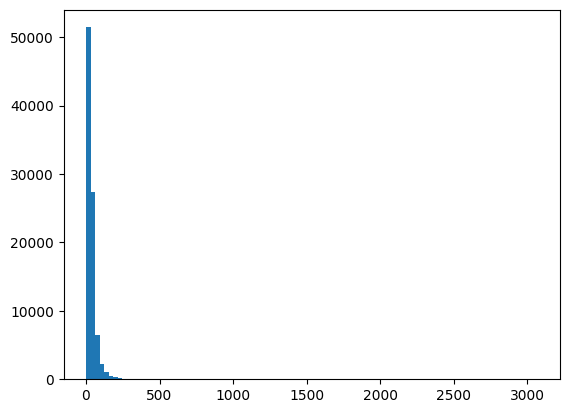

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(x.split(' ')) for x in X_train], bins = 100)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_token = tokenizer.texts_to_sequences(X_train)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
print(vocab_size)

87134


In [ ]:
from transformers import RobertaTokenizer, RobertaModel

# Load the RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#print(model)

### SARCASM Dataloader

In [ ]:
from torch.utils.data import Dataset
import numpy as np
import re
import nltk
import string

class SARCDataset(Dataset):
    def __init__(self, X, y, tokenizer):
        texts = X

        texts = [self._preprocess(text) for text in texts]

        self._print_random_samples(texts)

        self.texts = [tokenizer(text, padding='max_length',
                                max_length = 200,
                                truncation=True,
                                return_tensors="pt")
                      for text in texts]

        self.labels = y

    def _print_random_samples(self, texts):
        np.random.seed(42)
        random_entries = np.random.randint(0, len(texts), 5)

        for i in random_entries:
            print(f"Entry {i}: {texts[i]}")

        print()

    def _preprocess(self, text):
        text = self._remove_amp(text)
        text = self._remove_links(text)
        text = self._remove_hashes(text)
        text = self._remove_retweets(text)
        text = self._remove_mentions(text)
        text = self._remove_multiple_spaces(text)

        #text = self._lowercase(text)
        text = self._remove_punctuation(text)
        #text = self._remove_numbers(text)

        text_tokens = self._tokenize(text)
        text_tokens = self._stopword_filtering(text_tokens)
        #text_tokens = self._stemming(text_tokens)
        text = self._stitch_text_tokens_together(text_tokens)

        return text.strip()


    def _remove_amp(self, text):
        return text.replace("&amp;", " ")

    def _remove_mentions(self, text):
        return re.sub(r'(@.*?)[\s]', ' ', text)

    def _remove_multiple_spaces(self, text):
        return re.sub(r'\s+', ' ', text)

    def _remove_retweets(self, text):
        return re.sub(r'^RT[\s]+', ' ', text)

    def _remove_links(self, text):
        return re.sub(r'https?:\/\/[^\s\n\r]+', ' ', text)

    def _remove_hashes(self, text):
        return re.sub(r'#', ' ', text)

    def _stitch_text_tokens_together(self, text_tokens):
        return " ".join(text_tokens)

    def _tokenize(self, text):
        return nltk.word_tokenize(text, language="english")

    def _stopword_filtering(self, text_tokens):
        stop_words = nltk.corpus.stopwords.words('english')

        return [token for token in text_tokens if token not in stop_words]

    def _stemming(self, text_tokens):
        porter = nltk.stem.porter.PorterStemmer()
        return [porter.stem(token) for token in text_tokens]

    def _remove_numbers(self, text):
        return re.sub(r'\d+', ' ', text)

    def _lowercase(self, text):
        return text.lower()

    def _remove_punctuation(self, text):
        return ''.join(character for character in text if character not in string.punctuation)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]

        label = -1
        if hasattr(self, 'labels'):
            label = self.labels[idx]

        return text, label

#### Train Test Split

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train_sarc = SARCDataset(X_train, y_train, tokenizer)

Entry 15795: Parent Comment I think pressing issue theyre going call nexus 4710 successors Reply The 4s 7s 10s
Entry 860: Parent Comment As former Reserve POG zero deployments heres opinion matter I feel qualified give Reply Youre still wrong
Entry 76820: Parent Comment paying every month meet hackers isnt acceptable Reply ESEA pay sub play vs cheaters hide
Entry 54886: Parent Comment OnePlus X Ceramic Just 10000 units available globally Reply Still available units one plus two
Entry 6265: Parent Comment That little gas station flip knife joke test Let run fixed blade Buck knife armor see happens Reply thats flip knife stained FT think around 60 dollars



In [ ]:
test_sarc = SARCDataset(X_test, y_test, tokenizer)

Entry 23654: Parent Comment Like Hermione Reply Whoremynun
Entry 15795: Parent Comment Breel Embolo join Manchester United instead RB Leipzig according reports regional newspaper LVZ Reply I heard Mourinho like Youth
Entry 860: Parent Comment It They cant accept backed horrible candidate HRC And voted block Donny Dumbass Shouldve Bernie You never convince otherwise Reply Something something entitled millennials
Entry 5390: Parent Comment Yeah time one complicated I hoping advice one Reply Halo 3 hands
Entry 29802: Parent Comment Unrelated try maps Dust2 Reply map CS GO



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_sarc, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = DataLoader(test_sarc, batch_size=32, num_workers=4)

In [ ]:
from torch import nn

class SARCClassifier(nn.Module):
    def __init__(self, base_model):
        super(SARCClassifier, self).__init__()

        self.bert = base_model  # Pre-trained BERT or RoBERTa model
        self.dropout = nn.Dropout(p=0.1)  # Dropout with a low rate for regularization
        self.fc1 = nn.Linear(768, 32)  # Fully connected layer to reduce dimensionality
        self.bn = nn.BatchNorm1d(32)  # Batch normalization for stability
        self.fc2 = nn.Linear(32, 1)  # Output layer for binary classification

        self.relu = nn.ReLU()  # Non-linearity
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary output

    def forward(self, input_ids, attention_mask):
        # Extract embeddings from the base model (CLS token representation)
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0][:, 0]

        # Apply dropout, fully connected layer, batch normalization, and activation
        x = self.dropout(bert_out)
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)

        # Final output layer with sigmoid activation
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

#### Training code

In [ ]:
import torch
from torch.optim import Adam
from tqdm import tqdm
from  sklearn.metrics import f1_score, roc_auc_score, accuracy_score

def train(model, train_dataloader, val_dataloader, learning_rate, epochs):
    best_val_loss = float('inf')
    early_stopping_threshold_count = 0
    EARLY_STOPPING = 3

    # GPU setting
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # Loss funtion and optimizer
    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    model = model.to(device)
    criterion = criterion.to(device)

    model_metrics = {}
    model_metrics['train_accuracy'] = []
    model_metrics['val_accuracy'] = []
    model_metrics['train_loss'] = []
    model_metrics['val_loss'] = []
    model_metrics['f1'] = []
    model_metrics['val_f1'] = []
    model_metrics['auc'] = []
    model_metrics['val_auc'] = []


    for epoch in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        total_f1_train = 0
        total_auc_train = 0

        model.train()

        for train_input, train_label in tqdm(train_dataloader):
            attention_mask = train_input['attention_mask'].to(device)
            input_ids = train_input['input_ids'].squeeze(1).to(device)

            train_label = train_label.to(device)

            # Forward Pass
            output = model(input_ids, attention_mask)

            loss = criterion(output, train_label.float().unsqueeze(1))

            total_loss_train += loss.item()

            acc = ((output >= 0.5).int() == train_label.unsqueeze(1)).sum().item()
            total_acc_train += acc

            # Calculatin AUC & F1 Score
            out_preds = output.cpu().detach().numpy().flatten()
            targets = train_label.cpu().detach().numpy().flatten()
            try:
              auc_score = roc_auc_score(targets, out_preds)
            except:
              auc_score = 1
            total_auc_train += auc_score

            out_preds[out_preds < 0.5] = 0
            out_preds[out_preds >= 0.5] = 1
            f1_score_ = f1_score(targets, out_preds)
            total_f1_train += f1_score_

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        with torch.no_grad():
            total_acc_val = 0
            total_loss_val = 0
            total_f1_val = 0
            total_auc_val = 0

            model.eval()

            for val_input, val_label in tqdm(val_dataloader):
                attention_mask = val_input['attention_mask'].to(device)
                input_ids = val_input['input_ids'].squeeze(1).to(device)

                val_label = val_label.to(device)

                output = model(input_ids, attention_mask)

                loss = criterion(output, val_label.float().unsqueeze(1))

                total_loss_val += loss.item()

                acc = ((output >= 0.5).int() == val_label.unsqueeze(1)).sum().item()
                total_acc_val += acc

                out_preds = output.cpu().detach().numpy().flatten()
                targets = val_label.cpu().detach().numpy().flatten()
                try:
                  auc_score = roc_auc_score(targets, out_preds)
                except:
                  auc_score = 1.
                total_auc_val += auc_score

                out_preds[out_preds < 0.5] = 0
                out_preds[out_preds >= 0.5] = 1
                f1_score_ = f1_score(targets, out_preds)
                total_f1_val += f1_score_


            print(f'Epochs: {epoch + 1} '
                  f'| Train Loss: {total_loss_train / len(train_dataloader): .3f} '
                  f'| Train Accuracy: {total_acc_train / (len(train_dataloader.dataset)): .3f} '
                  f'| Val Loss: {total_loss_val / len(val_dataloader): .3f} '
                  f'| Val Accuracy: {total_acc_val / len(val_dataloader.dataset): .3f}')
            model_metrics['train_accuracy'].append(total_acc_train / (len(train_dataloader.dataset)))
            model_metrics['val_accuracy'].append(total_acc_val / len(val_dataloader.dataset))
            model_metrics['train_loss'].append(total_loss_train / len(train_dataloader))
            model_metrics['val_loss'].append(total_loss_val / len(val_dataloader))
            model_metrics['f1'].append(total_f1_train / len(train_dataloader))
            model_metrics['val_f1'].append(total_f1_val / len(val_dataloader))
            model_metrics['auc'].append(total_auc_train / len(train_dataloader))
            model_metrics['val_auc'].append(total_auc_val / len(val_dataloader))

            print(model_metrics)

            if best_val_loss > total_loss_val:
                best_val_loss = total_loss_val
                torch.save(model, "/content/drive/MyDrive/best3_model.pt")
                print("Saved model")

                # Save only the weights
                torch.save(model.state_dict(), "/content/drive/MyDrive/best3_model_weights.pt")
                print("Saved model weights")
                early_stopping_threshold_count = 0
            else:
                early_stopping_threshold_count += 1

            if early_stopping_threshold_count >= EARLY_STOPPING:
                print("Early stopping")
                break
    return model_metrics

In [ ]:
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader

import torch
import numpy as np

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Specify the BERT model
BERT_MODEL = "roberta-base"  # Switch to BERT model
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)  # Load BERT tokenizer
base_model = AutoModel.from_pretrained(BERT_MODEL)  # Load BERT model

# Custom classifier built on top of BERT
model = SARCClassifier(base_model)

# Hyperparameters
learning_rate = 1e-5  # Fine-tuning learning rate
epochs = 6  # Number of epochs

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
metrics = train(model, train_dataloader, val_dataloader, learning_rate, epochs)

100%|██████████| 938/938 [04:45<00:00,  3.28it/s]


Epochs: 1 | Train Loss:  0.605 | Train Accuracy:  0.670 | Val Loss:  0.565 | Val Accuracy:  0.709
{'train_accuracy': [0.6699444444444445], 'val_accuracy': [0.7089], 'train_loss': [0.6047854994354492], 'val_loss': [0.5653765126903937], 'f1': [0.6132419772110577], 'val_f1': [0.6923399157971986], 'auc': [0.7361152082306358], 'val_auc': [0.7823735248200882]}
Saved model
Saved model weights


100%|██████████| 938/938 [04:45<00:00,  3.28it/s]


Epochs: 2 | Train Loss:  0.542 | Train Accuracy:  0.725 | Val Loss:  0.552 | Val Accuracy:  0.722
{'train_accuracy': [0.6699444444444445, 0.7249444444444444], 'val_accuracy': [0.7089, 0.7220333333333333], 'train_loss': [0.6047854994354492, 0.5416466009773651], 'val_loss': [0.5653765126903937, 0.5520108368859362], 'f1': [0.6132419772110577, 0.699326461021344], 'val_f1': [0.6923399157971986, 0.7012819673260737], 'auc': [0.7361152082306358, 0.806118848157812], 'val_auc': [0.7823735248200882, 0.7984153687641722]}
Saved model
Saved model weights


100%|██████████| 938/938 [04:45<00:00,  3.28it/s]


Epochs: 3 | Train Loss:  0.497 | Train Accuracy:  0.759 | Val Loss:  0.560 | Val Accuracy:  0.721
{'train_accuracy': [0.6699444444444445, 0.7249444444444444, 0.7591555555555556], 'val_accuracy': [0.7089, 0.7220333333333333, 0.7214333333333334], 'train_loss': [0.6047854994354492, 0.5416466009773651, 0.497054853930492], 'val_loss': [0.5653765126903937, 0.5520108368859362, 0.560386814129378], 'f1': [0.6132419772110577, 0.699326461021344, 0.7420276640545801], 'val_f1': [0.6923399157971986, 0.7012819673260737, 0.7023049663385864], 'auc': [0.7361152082306358, 0.806118848157812, 0.843892706796082], 'val_auc': [0.7823735248200882, 0.7984153687641722, 0.7977795220226069]}


100%|██████████| 938/938 [04:45<00:00,  3.28it/s]


Epochs: 4 | Train Loss:  0.450 | Train Accuracy:  0.792 | Val Loss:  0.572 | Val Accuracy:  0.722
{'train_accuracy': [0.6699444444444445, 0.7249444444444444, 0.7591555555555556, 0.7923222222222223], 'val_accuracy': [0.7089, 0.7220333333333333, 0.7214333333333334, 0.7224333333333334], 'train_loss': [0.6047854994354492, 0.5416466009773651, 0.497054853930492, 0.45040641206462656], 'val_loss': [0.5653765126903937, 0.5520108368859362, 0.560386814129378, 0.5717416973129265], 'f1': [0.6132419772110577, 0.699326461021344, 0.7420276640545801, 0.7822747181061787], 'val_f1': [0.6923399157971986, 0.7012819673260737, 0.7023049663385864, 0.7076666077867246], 'auc': [0.7361152082306358, 0.806118848157812, 0.843892706796082, 0.8784618026058941], 'val_auc': [0.7823735248200882, 0.7984153687641722, 0.7977795220226069, 0.7973812443747567]}


 83%|████████▎ | 2344/2813 [37:38<07:31,  1.04it/s]

In [ ]:
metrics

In [ ]:
import pickle

# Dump the model
with open('/content/drive/MyDrive/model_1.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:

main_accuracy = metrics['val_accuracy'][-1]  # Last epoch's validation accuracy
print(f"Main Validation Accuracy (Final Epoch): {main_accuracy * 100:.2f}%")


In [ ]:
plt.plot(np.array(metrics['train_accuracy']) * 100.)
plt.plot(np.array(metrics['val_accuracy']) * 100.)
plt.legend(['train', 'valid'])
plt.title('Accuracy plot for RoBERTa')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()

In [ ]:
plt.plot(np.array(metrics['train_loss']))
plt.plot(np.array(metrics['val_loss']))
plt.legend(['train', 'valid'])
plt.title('Loss plot for RoBERTa')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.show()

In [ ]:
plt.plot(np.array(metrics['f1']) * 100)
plt.plot(np.array(metrics['val_f1']) * 100)
plt.legend(['train', 'valid'])
plt.title('F1-score plot for RoBERTa')
plt.xlabel('Epoch')
plt.ylabel('F1-score (%)')
plt.show()

In [ ]:
plt.plot(np.array(metrics['auc']) * 100)
plt.plot(np.array(metrics['val_auc']) * 100)
plt.legend(['train', 'valid'])
plt.title('AUC plot for RoBERTa')
plt.xlabel('Epoch')
plt.ylabel('AUC-score (%)')
plt.show()